In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats

import matplotlib as mat
import matplotlib.pyplot as plt
mat.style.use('ggplot')

from src.pricer.black_scholes_pricer import*
%load_ext autoreload
%autoreload 2
%matplotlib inline
# https://financetrainingcourse.com/education/2014/06/vega-volga-and-vanna-the-volatility-greeks/
# sensitivity
# https://en.wikipedia.org/wiki/Greeks_(finance)#Vanna
# http://slideplayer.com/slide/6849258/

Vanna
1. $\frac{dV}{dS}$ Change in Vega with respect to change in spot. (DvegaDspot)
2. $\frac{d\delta}{d\sigma}$ Change in Delta with respect to change in vol. (DdeltaDvega)

$ vanna = e^{-qt}\sqrt{T-t}N'(d1)(\frac{d2}{\sigma})$ where $N'()$ is the derivative of the CDF of the standard normal distribution. Recall that standard normal distribution is given by $=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$, and by the fundemantal laws of calculs we know that $F'(x) = f(x)$ where $f(x)$ is the pdf.

Volga or Vomma
1. $\frac{dV}{d\sigma}$ Change in vega with respect to change in vol. (DvegaDvol)

$volga = e^{-qt}\sqrt{T-t}N'(d1)(\frac{d1d2}{\sigma})$

In [2]:
rf = 0.01
T = 365
S = np.array([100])
X = np.array([120])
v = 0.20
d = 0.0
t = 100
op_type = "call"
pricer = BSPricer(rf,T)
c = pricer.price(S, X, v, d, t, op_type, True)
c

array([ 0.20146374])

In [3]:
pricer.print_greeks()

1st order greeks.
('Delta: ', array([ 0.04814515]))
('Gamma: ', array([ 0.00955897]))
('Theta: ', array([-0.00472233]))
('Vega: ', array([ 0.0523779]))
('Rho: ', array([ 0.0126385]))
2nd order greeks.
('Vanna: ', array([ 0.88449725]))
('Volga: ', array([ 76.99653786]))


In [4]:
df = pd.DataFrame()
vanna = []
vega = []
delta = []
theta = []
gamma = []
volga = []
for t in xrange(1,100):
    S_ = np.arange(50,150,2)
    X_ = np.ones(len(S_))*120
    cs = pricer.price(S_, X_, v, d, t, op_type, True)
    vanna.append(pricer.vanna)
    volga.append(pricer.volga)
    vega.append(pricer.vega)
    delta.append(pricer.delta)
    theta.append(pricer.theta)
    gamma.append(pricer.gamma)    

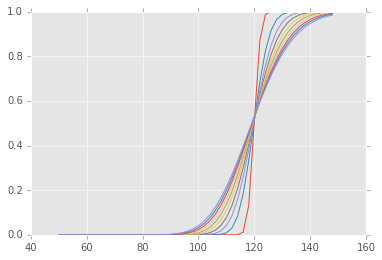

In [5]:
for t in xrange(1,100,10):
    plt.plot(S_, delta[t])
    
# Delta profile for a call. 
# For a given spot price, we can observe that the delat decays to zero, if spot is below the strike, and attracts
# to 1.0 if above the strike.

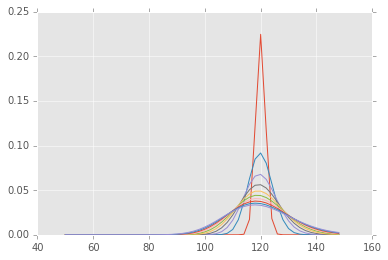

In [6]:
for t in xrange(1,100,10):
    plt.plot(S_, gamma[t])
    
# Gamma profile for a call.
# We can see that gamma is at a maximum just below strike, and increases as we approach expiry.

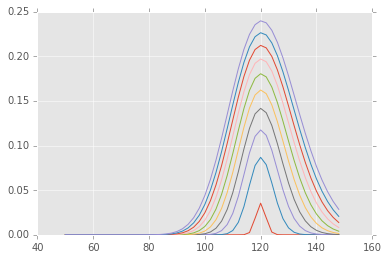

In [7]:
for t in xrange(1,100,10):
    plt.plot(S_, vega[t])

# Vega is distributed symmetrically around the strike, and largest at start of contract.

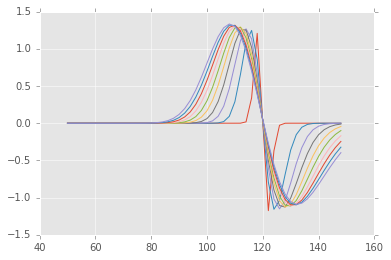

In [8]:
for t in xrange(1,100,10):
    plt.plot(S_, vanna[t])
    
# Vanna DdeltaDvega or DvegaDspot..We can observe that vanna is negative when spot is above the strike and the
# sensitivity increases with duration. (Not 100% confident of results...need to check)

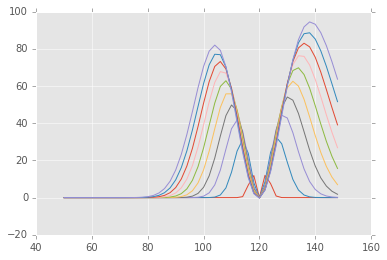

In [9]:
for t in xrange(1,100,10):
    plt.plot(S_, volga[t])
#Volga or vomma, DVegaDvol  (Not 100% confident of results...need to check)